<a href="https://colab.research.google.com/github/fjgr/IA_BigData/blob/main/IA_BigData/7RO/TAREA%202%20Recorrido%20en%20profundidad/SVM%20M%C3%A1quinas%20de%20Vector%20de%20Soporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: FRANCISCO JOSE GONZALEZ RODRIGUEZ

Class labels:  [0 1 2]
Class names :  ['Setosa', 'Versicolor', 'Virginica']
Precisión del modelo lineal: 0.98
Reporte de clasificación para el modelo lineal:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       0.94      1.00      0.97        15
   Virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



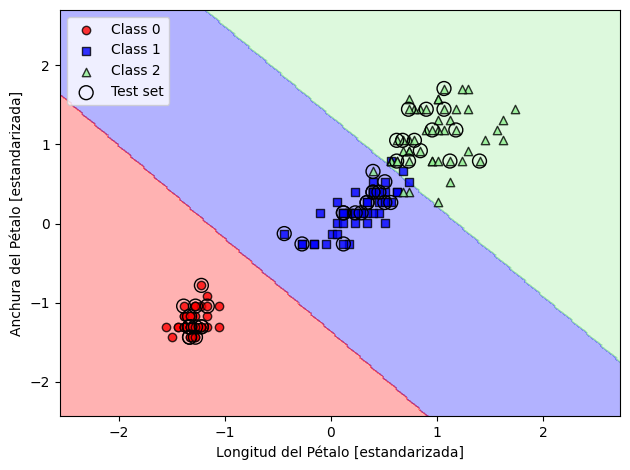

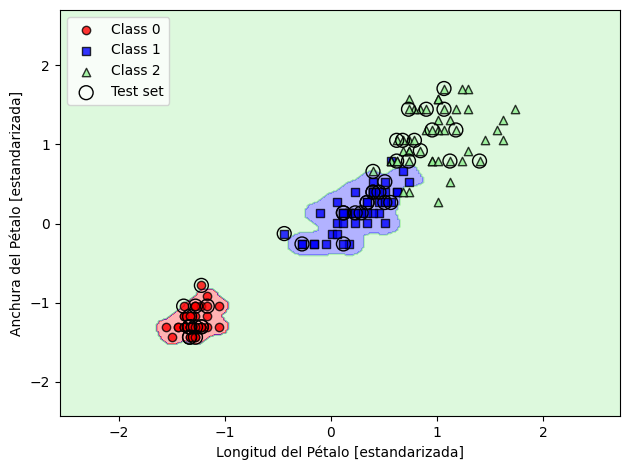

In [8]:
# Importación de librerías.
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Carga del aataset Iris.
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# División en conjunto de entrenamiento(70%) y prueba(30%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Etiquetas y nombres de las clases.
class_names = ['Setosa', 'Versicolor', 'Virginica']
print('Class labels: ', np.unique(y))
print('Class names : ', class_names)

# Definición de la función "plot_decision_regions".
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=f'Class {cl}', edgecolor='black')
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='Test set')

# Estandarización de los datos.
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Entrenamiento del modelo SVC con "kernel='linear'".
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

# Predecir en el conjunto de prueba
y_pred = svm.predict(X_test_std)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo lineal: {accuracy:.2f}')

# Mostrar el reporte de clasificación
print("Reporte de clasificación para el modelo lineal:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Gráfica de las regiones de decisión del modelo lineal.
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Longitud del Pétalo [estandarizada]')
plt.ylabel('Anchura del Pétalo [estandarizada]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Repetición del modelo con "kernel='rbf'"
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Longitud del Pétalo [estandarizada]')
plt.ylabel('Anchura del Pétalo [estandarizada]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
